In [3]:
import tensorflow as tf

tensorflow_version = tf.__version__

gpu_availabe = tf.test.is_gpu_available()

print("tensorflow version:",tensorflow_version,"\tGPU:",gpu_availabe)

tensorflow version: 2.0.0 	GPU: False


2021-11-27 00:00:25.156933: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
a = tf.constant([1.0,2.0],name="a")
b = tf.constant([1.0,2.0],name="b")
result = tf.add(a,b,name="add")
print(result)

tf.Tensor([2. 4.], shape=(2,), dtype=float32)


2021-11-27 00:00:25.179281: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [5]:
w = tf.Variable(tf.constant(5,dtype=tf.float32))
# 学习率
lr = 0.2
# 循环次数
epoch = 40

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        tape.watch(w)
        # 定义损失函数
        loss = tf.square(w + 1)
    grads = tape.gradient(loss,w)
    
    w.assign_sub(lr * grads)
    print("After %s epoch,w is %f,loss is %f" % (epoch,w.numpy(),loss))

After 0 epoch,w is 2.600000,loss is 36.000000
After 1 epoch,w is 1.160000,loss is 12.959999
After 2 epoch,w is 0.296000,loss is 4.665599
After 3 epoch,w is -0.222400,loss is 1.679616
After 4 epoch,w is -0.533440,loss is 0.604662
After 5 epoch,w is -0.720064,loss is 0.217678
After 6 epoch,w is -0.832038,loss is 0.078364
After 7 epoch,w is -0.899223,loss is 0.028211
After 8 epoch,w is -0.939534,loss is 0.010156
After 9 epoch,w is -0.963720,loss is 0.003656
After 10 epoch,w is -0.978232,loss is 0.001316
After 11 epoch,w is -0.986939,loss is 0.000474
After 12 epoch,w is -0.992164,loss is 0.000171
After 13 epoch,w is -0.995298,loss is 0.000061
After 14 epoch,w is -0.997179,loss is 0.000022
After 15 epoch,w is -0.998307,loss is 0.000008
After 16 epoch,w is -0.998984,loss is 0.000003
After 17 epoch,w is -0.999391,loss is 0.000001
After 18 epoch,w is -0.999634,loss is 0.000000
After 19 epoch,w is -0.999781,loss is 0.000000
After 20 epoch,w is -0.999868,loss is 0.000000
After 21 epoch,w is -0.9

In [6]:
# 张量 tensor
a = tf.constant([1,5],dtype=tf.int64)
print(a)
print(a.dtype)
print(a.shape) # shape=(2,) 表示 1维张量 y有两个元素

tf.Tensor([1 5], shape=(2,), dtype=int64)
<dtype: 'int64'>
(2,)


In [7]:
import numpy as np
a = np.arange(0,5)
b = tf.convert_to_tensor(a,dtype=tf.int64)
print(a)
print(b)

[0 1 2 3 4]
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


In [11]:
#常用函数
# 1.强制转换 tf.cast(张量名,dtype=数据类型)
# 2.计算张量维度上元素的最小值 tf.reduce_min(张量名)
# 3.计算张量维度上元素的最大值 tf.reduce_max(张量名)
# 4.计算张量沿指定维度的平均值 tf.reduce_mean(张量名，axis=操作轴) 0为y方向 1为x方向
# 5.计算张量沿指定维度的和 tf.reduce_sum(张量名，axis=操作轴)
x1 = tf.constant([1.,2.,3.],dtype=tf.float64)
print(x1)

x2 = tf.cast(x1,tf.int32)
print(x2)

print(tf.reduce_min(x2),tf.reduce_max(x2))

x = tf.constant([[1,2,3],[2,2,3]])
print(x)
print(tf.reduce_mean(x))
print(tf.reduce_sum(x,axis=1))

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[1 2 3]
 [2 2 3]], shape=(2, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)


In [14]:
# 5.tf.Variable(初始值) 将变量标记为可训练的，被标记的变量会在反向传播中记录梯度信息
# 6. tf.add tf.subtract tf.multiply tf.divide 只有维度相同的张量才能进行四则运算
# 7. tf.square 平方 tf.pow n次方 tf.sqrt 开平方根
# 8. tf.matmul 矩阵乘
# 9. tf.data.Dataset.from_tensor_slices 切分传入张量的第一维度，生成输入特征/标签对，构建数据集
#     eg. tf.data.Dataset.from_tensor_slices((输入特征,标签))
features = tf.constant([12,23,10,17])
lables = tf.constant([0,1,1,0])
dataset = tf.data.Dataset.from_tensor_slices((features,lables))
print(dataset)
for e in dataset:
    print(e)

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>
(<tf.Tensor: id=490, shape=(), dtype=int32, numpy=12>, <tf.Tensor: id=491, shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: id=492, shape=(), dtype=int32, numpy=23>, <tf.Tensor: id=493, shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: id=494, shape=(), dtype=int32, numpy=10>, <tf.Tensor: id=495, shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: id=496, shape=(), dtype=int32, numpy=17>, <tf.Tensor: id=497, shape=(), dtype=int32, numpy=0>)


In [15]:
# 10. tf.GradientTape with结构记录计算过程，gradient求出张量的梯度

with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w,2)
grad = tape.gradient(loss,w)
print(grad)


tf.Tensor(6.0, shape=(), dtype=float32)


In [17]:
# 11. enumerate(列表名) python的内建函数，它可以遍历每个元素，组合为：索引 元素，常在for循环中使用
seq = ['one','two']
for index,item in enumerate(seq):
    print(index,item)

0 one
1 two


In [19]:
# 12. tf.one_hot(待转换数据，depth=几分类) 将待转换数据转换为one_hot形式的数据输出
# 独热编码：在分类问题中，常用独热码做标签，标记类别： 1表示是，0表示非
classes = 3
lables = tf.constant([1,0,2]) #输入的元素最小值为0，最大值为2
output = tf.one_hot(lables,depth=classes)
print(output)

tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [20]:
# tf.nn.softmax 使输出符合概率分布

y = tf.constant([1.01,2.01,-0.66])
y_pro = tf.nn.softmax(y)
print("after softmax,y_pro is:",y_pro)


after softmax,y_pro is: tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)


In [21]:
# 14. assign_sub 赋值操作，更新参数的值并返回 
#                调用assign_sub之前，先调用tf.Variable定义变量w为可训练(可自更新)
# w.assign_sub(w要自减的内容)
w = tf.Variable(4)
w.assign_sub(1)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [22]:
# 15. tf.argmax(张量名,axis=操作轴) 返回张量沿指定维度最大索引

test = np.array([[1,2,3],[2,3,4],[5,4,3],[8,7,2]])
print(test)
print(tf.argmax(test,axis=0))
print(tf.argmax(test,axis=1))

[[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


In [24]:
from sklearn import datasets
from pandas import DataFrame
import pandas as pd

x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
print(x_data)
print(y_data)

x_data = DataFrame(x_data,columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽度'])
pd.set_option('display.unicode.east_asian_width',True)
print('x_data add index:\n',x_data)

x_data['类别'] = y_data
print('x_data add a colum: \n',x_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Epoch:0 loss:0.2878302298486233
test acc: 0.16666666666666666
-----------------------
Epoch:1 loss:0.26063910499215126
test acc: 0.16666666666666666
-----------------------
Epoch:2 loss:0.23041951656341553
test acc: 0.16666666666666666
-----------------------
Epoch:3 loss:0.21433782950043678
test acc: 0.16666666666666666
-----------------------
Epoch:4 loss:0.2026178054511547
test acc: 0.16666666666666666
-----------------------
Epoch:5 loss:0.19115766137838364
test acc: 0.5333333333333333
-----------------------
Epoch:6 loss:0.18036313727498055
test acc: 0.5333333333333333
-----------------------
Epoch:7 loss:0.170701764523983
test acc: 0.5333333333333333
-----------------------
Epoch:8 loss:0.16233016550540924
test acc: 0.5333333333333333
-----------------------
Epoch:9 loss:0.1551971398293972
test acc: 0.5333333333333333
-----------------------
Epoch:10 loss:0.1491540763527155
test acc: 0.5333333333333333
-----------------------
Epoch:11 loss:0.1440271269530058
test acc: 0.533333333

Epoch:98 loss:0.07139434944838285
test acc: 0.8666666666666667
-----------------------
Epoch:99 loss:0.07105048932135105
test acc: 0.8666666666666667
-----------------------
Epoch:100 loss:0.07071020640432835
test acc: 0.8666666666666667
-----------------------
Epoch:101 loss:0.07037349510937929
test acc: 0.8666666666666667
-----------------------
Epoch:102 loss:0.07004028651863337
test acc: 0.8666666666666667
-----------------------
Epoch:103 loss:0.06971054803580046
test acc: 0.8666666666666667
-----------------------
Epoch:104 loss:0.0693842489272356
test acc: 0.8666666666666667
-----------------------
Epoch:105 loss:0.06906134821474552
test acc: 0.9
-----------------------
Epoch:106 loss:0.0687418133020401
test acc: 0.9
-----------------------
Epoch:107 loss:0.06842559296637774
test acc: 0.9
-----------------------
Epoch:108 loss:0.06811266113072634
test acc: 0.9
-----------------------
Epoch:109 loss:0.06780297867953777
test acc: 0.9
-----------------------
Epoch:110 loss:0.067496

Epoch:197 loss:0.049728275276720524
test acc: 1.0
-----------------------
Epoch:198 loss:0.049595437943935394
test acc: 1.0
-----------------------
Epoch:199 loss:0.04946370515972376
test acc: 1.0
-----------------------
Epoch:200 loss:0.04933304898440838
test acc: 1.0
-----------------------
Epoch:201 loss:0.04920346476137638
test acc: 1.0
-----------------------
Epoch:202 loss:0.04907494131475687
test acc: 1.0
-----------------------
Epoch:203 loss:0.04894745443016291
test acc: 1.0
-----------------------
Epoch:204 loss:0.04882101248949766
test acc: 1.0
-----------------------
Epoch:205 loss:0.04869559034705162
test acc: 1.0
-----------------------
Epoch:206 loss:0.04857117123901844
test acc: 1.0
-----------------------
Epoch:207 loss:0.04844775516539812
test acc: 1.0
-----------------------
Epoch:208 loss:0.048325324431061745
test acc: 1.0
-----------------------
Epoch:209 loss:0.04820386879146099
test acc: 1.0
-----------------------
Epoch:210 loss:0.04808338452130556
test acc: 1.0

Epoch:310 loss:0.0395117849111557
test acc: 1.0
-----------------------
Epoch:311 loss:0.03945077722892165
test acc: 1.0
-----------------------
Epoch:312 loss:0.039390109945088625
test acc: 1.0
-----------------------
Epoch:313 loss:0.03932978492230177
test acc: 1.0
-----------------------
Epoch:314 loss:0.03926981007680297
test acc: 1.0
-----------------------
Epoch:315 loss:0.03921017283573747
test acc: 1.0
-----------------------
Epoch:316 loss:0.03915085690096021
test acc: 1.0
-----------------------
Epoch:317 loss:0.039091880433261395
test acc: 1.0
-----------------------
Epoch:318 loss:0.03903323179110885
test acc: 1.0
-----------------------
Epoch:319 loss:0.03897490864619613
test acc: 1.0
-----------------------
Epoch:320 loss:0.038916910998523235
test acc: 1.0
-----------------------
Epoch:321 loss:0.03885922580957413
test acc: 1.0
-----------------------
Epoch:322 loss:0.03880185913294554
test acc: 1.0
-----------------------
Epoch:323 loss:0.03874481841921806
test acc: 1.0


Epoch:422 loss:0.03430956695228815
test acc: 1.0
-----------------------
Epoch:423 loss:0.03427429124712944
test acc: 1.0
-----------------------
Epoch:424 loss:0.03423916408792138
test acc: 1.0
-----------------------
Epoch:425 loss:0.03420418594032526
test acc: 1.0
-----------------------
Epoch:426 loss:0.03416935168206692
test acc: 1.0
-----------------------
Epoch:427 loss:0.03413466503843665
test acc: 1.0
-----------------------
Epoch:428 loss:0.03410012507811189
test acc: 1.0
-----------------------
Epoch:429 loss:0.03406573086977005
test acc: 1.0
-----------------------
Epoch:430 loss:0.03403147542849183
test acc: 1.0
-----------------------
Epoch:431 loss:0.03399735316634178
test acc: 1.0
-----------------------
Epoch:432 loss:0.03396338410675526
test acc: 1.0
-----------------------
Epoch:433 loss:0.0339295482262969
test acc: 1.0
-----------------------
Epoch:434 loss:0.03389585530385375
test acc: 1.0
-----------------------
Epoch:435 loss:0.03386229882016778
test acc: 1.0
---

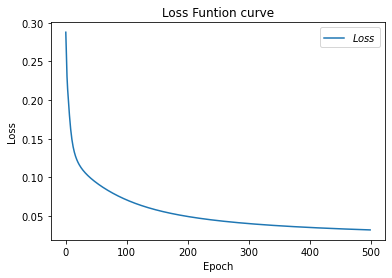

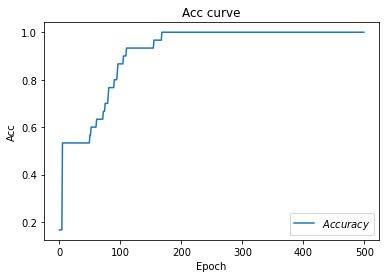

In [36]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)

# 分批
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(30)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(30)

# 生成神经网络的参数，4个输入特征，所以输入层为4个输入节点，因为3分类，所以输出层为3个神经元
# 使用seed使每次生成的随机数相同（在现实使用时不写）
# stddev 标准差
w1 = tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

lr = 0.1 #学习率
train_loss_results = []
test_acc = []
epoch = 500
loss_all = 0

for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train,w1)+b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train,depth=3)
            loss = tf.reduce_mean(tf.square(y_-y))
            loss_all += loss.numpy()
            
        grads = tape.gradient(loss,[w1,b1])
        
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
        
    print("Epoch:{} loss:{}".format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)
    loss_all = 0
    
    
    total_correct,total_number= 0,0
    for x_test,y_test in test_db:
        y = tf.matmul(x_test,w1)+b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y,axis=1)
        
        correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        
        total_correct += int(correct)
        
        total_number += x_test.shape[0]
        
    acc = total_correct/total_number
    test_acc.append(acc)
    print("test acc:",acc)
    print("-----------------------")
    
plt.title("Loss Funtion curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results,label="$Loss$") #
plt.legend() #画出曲线
plt.show()

plt.title("Acc curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc,label="$Accuracy$") #
plt.legend() #画出曲线
plt.show()